# Online Selection of HLS Representations

In [1]:
from lrcb.bandits.multirep_finite import FiniteMultiBandit
from lrcb.representations.finite_representations import make_random_rep, hls_rank, rank, derank_hls, make_hls_rank
from lrcb.representations.finite_representations import is_cmb, is_hls, spans, hls_lambda
from lrcb.algos.oful import oful
from lrcb.algos.lr_oful import select_oful
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lrcb.visualization.notebook_utils as nu

## Common settings

In [2]:
nc = 100
na = 5
dim = 20
noise = 0.1
seeds = range(10)

Generate original HLS representation

In [3]:
r0 = make_random_rep(nc, na, dim, normalize=True)
assert is_hls(r0)

OFUL settings

In [4]:
iterations = 1000
reg = 0.1
delta = 0.1
param_bound = 1. #Guaranteed by make_random_rep(..., normalize=True)

## CMB, destructive approach, same parameter

Generate non-HLS equivalent representations with varying HLS rank

In [5]:
reps = [derank_hls(r0, i, transform=False) for i in range(1, dim)]
reps.append(r0)

for i, r in enumerate(reps[:-1]):
    assert r == reps[-1] #All representations are equivalent
    assert np.allclose(r._param, reps[-1]._param) #with the same parameter!
    assert not is_hls(r) #Only the original one is HLS
    assert spans(r) #All representations still span R^d
    print('%d/%d %s' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else ''))
print('%d/%d %s' % (hls_rank(reps[-1]), rank(reps[-1]), '(CMB)' if is_cmb(r) else ''))

#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB)
2/20 (CMB)
3/20 (CMB)
4/20 (CMB)
5/20 (CMB)
6/20 (CMB)
7/20 (CMB)
8/20 (CMB)
9/20 (CMB)
10/20 (CMB)
11/20 (CMB)
12/20 (CMB)
13/20 (CMB)
14/20 (CMB)
15/20 (CMB)
16/20 (CMB)
17/20 (CMB)
18/20 (CMB)
19/20 (CMB)
20/20 (CMB)


Regret of OFUL with different representations

In [6]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

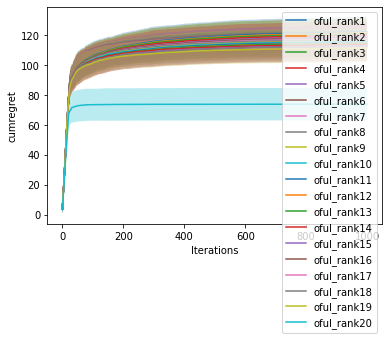

In [7]:
names = ['oful_rank%d' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret is (almost) sorted by hls rank, with the HLS representation having a large advantage

In [8]:
nu.tournament('../logs', names, 'cumregret', seeds)

[('oful_rank20', 73.9624110324839),
 ('oful_rank19', 111.52188594795545),
 ('oful_rank17', 112.12253335267917),
 ('oful_rank18', 112.59357196241656),
 ('oful_rank16', 112.74160274111787),
 ('oful_rank15', 113.12609620445873),
 ('oful_rank14', 113.9904113781678),
 ('oful_rank13', 114.70162676870211),
 ('oful_rank12', 114.8300498456181),
 ('oful_rank11', 115.61346145532177),
 ('oful_rank10', 116.03366501431529),
 ('oful_rank9', 116.36423195794882),
 ('oful_rank8', 117.14855513359987),
 ('oful_rank7', 117.79736911305608),
 ('oful_rank6', 118.67315467731282),
 ('oful_rank5', 119.33345608713675),
 ('oful_rank4', 120.17514059177142),
 ('oful_rank3', 121.17881123840615),
 ('oful_rank2', 121.8394001452776),
 ('oful_rank1', 122.4735829407175)]

Regret of model-selection algorithm compared to best model

In [9]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select')

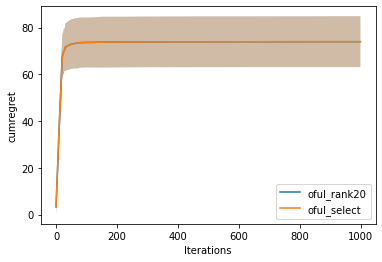

In [10]:
names = ['oful_rank%d' % dim, 'oful_select']
        
nu.compare('../logs', names, 'cumregret', seeds)

Representations selected by model-selection algorithm

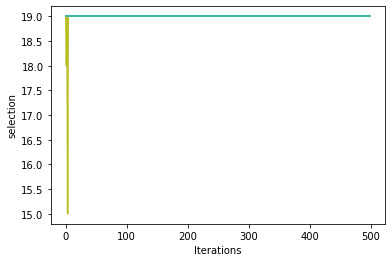

In [11]:
nu.plot_all('../logs', 'oful_select', 'selection', seeds, rows=500)

## CMB, destructive approach, different parameter

Re-use the same original HLS representation

Generate non-HLS **equivalent** representations with varying HLS rank **and different parameters**

In [12]:
reps = [derank_hls(r0, i, transform=True) for i in range(1, dim)] #Random transformation preserving equivalence
reps.append(r0)

for i, r in enumerate(reps[:-1]):
    assert r == reps[-1] #All representations are equivalent
    assert not np.allclose(r._param, reps[-1]._param) #But with different parameters!
    assert not is_hls(r) #Only the original one is HLS
    assert spans(r) #All representations still span R^d
    print('%d/%d %s' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else ''))
print('%d/%d %s' % (hls_rank(reps[-1]), rank(reps[-1]), '(CMB)' if is_cmb(r) else ''))

#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB)
2/20 (CMB)
3/20 (CMB)
4/20 (CMB)
5/20 (CMB)
6/20 (CMB)
7/20 (CMB)
8/20 (CMB)
9/20 (CMB)
10/20 (CMB)
11/20 (CMB)
12/20 (CMB)
13/20 (CMB)
14/20 (CMB)
15/20 (CMB)
16/20 (CMB)
17/20 (CMB)
18/20 (CMB)
19/20 (CMB)
20/20 (CMB)


Regret of OFUL with different representations

In [13]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d(t)' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

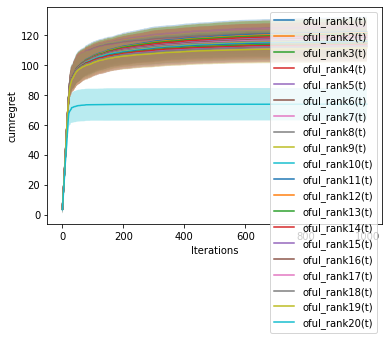

In [14]:
names = ['oful_rank%d(t)' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret is (almost) sorted by hls rank, with the HLS representation having a large advantage

In [15]:
nu.tournament('../logs', names, 'cumregret', seeds)

[('oful_rank20(t)', 73.9624110324839),
 ('oful_rank19(t)', 111.52188594795548),
 ('oful_rank17(t)', 112.12253335267917),
 ('oful_rank18(t)', 112.59357196241658),
 ('oful_rank16(t)', 112.74160274111789),
 ('oful_rank15(t)', 113.12609620445873),
 ('oful_rank14(t)', 113.99041137816785),
 ('oful_rank13(t)', 114.70162676870208),
 ('oful_rank12(t)', 114.83004984561815),
 ('oful_rank11(t)', 115.61346145532166),
 ('oful_rank10(t)', 116.03366501431529),
 ('oful_rank9(t)', 116.36423195794869),
 ('oful_rank8(t)', 117.14855513359969),
 ('oful_rank7(t)', 117.79736911305613),
 ('oful_rank6(t)', 118.67315467731274),
 ('oful_rank5(t)', 119.33345608713648),
 ('oful_rank4(t)', 120.17514059177142),
 ('oful_rank3(t)', 121.1788112384061),
 ('oful_rank2(t)', 121.83940014527779),
 ('oful_rank1(t)', 122.47358294071758)]

Regret of model-selection algorithm compared to best model

In [16]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select(t)')

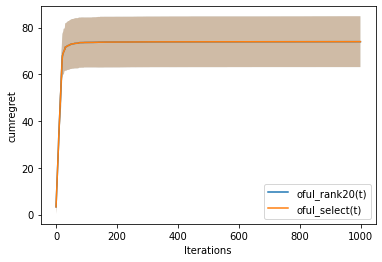

In [17]:
names = ['oful_rank%d(t)' % dim, 'oful_select(t)']
        
nu.compare('../logs', names, 'cumregret', seeds)

Representations selected by model-selection algorithm

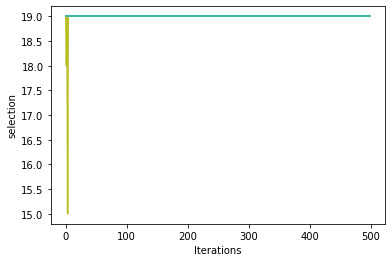

In [18]:
nu.plot_all('../logs', 'oful_select(t)', 'selection', seeds, rows=500)

## CMB, constructive approach (different parameter)

This time I construct a representation of the desired hls rank starting from (the same) reward function

In [19]:
y = r0._rewards

In [20]:
reps = [make_hls_rank(y, dim=dim, rank=i) for i in range(1, dim+1)]

for i, r in enumerate(reps):
    assert np.allclose(r._rewards, y)  #All representations are equivalent
    assert hls_rank(r) == i+1 #But with different HLS ranks
    assert spans(r) #All representations still span R^d
    print('%d/%d %s' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else ''))
    
#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB)
2/20 (CMB)
3/20 (CMB)
4/20 (CMB)
5/20 (CMB)
6/20 (CMB)
7/20 (CMB)
8/20 (CMB)
9/20 (CMB)
10/20 (CMB)
11/20 (CMB)
12/20 (CMB)
13/20 (CMB)
14/20 (CMB)
15/20 (CMB)
16/20 (CMB)
17/20 (CMB)
18/20 (CMB)
19/20 (CMB)
20/20 (CMB)


Regret of OFUL with different representations

In [21]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d(c)' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

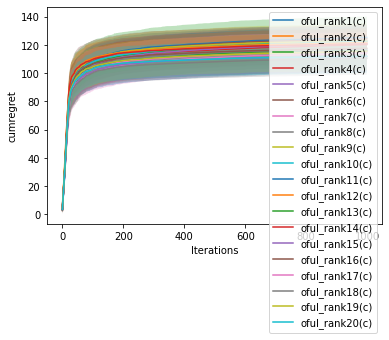

In [22]:
names = ['oful_rank%d(c)' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret

In [23]:
ranking = nu.tournament('../logs', names, 'cumregret', seeds)
ranking

[('oful_rank18(c)', 110.60329853218164),
 ('oful_rank15(c)', 111.9113483540209),
 ('oful_rank20(c)', 112.02214299368177),
 ('oful_rank7(c)', 114.29146306677009),
 ('oful_rank17(c)', 115.36042263738804),
 ('oful_rank19(c)', 115.53179066134877),
 ('oful_rank13(c)', 116.05175882488693),
 ('oful_rank11(c)', 116.1793989218111),
 ('oful_rank8(c)', 117.17651943109836),
 ('oful_rank16(c)', 117.67811662456106),
 ('oful_rank4(c)', 120.34327804460335),
 ('oful_rank14(c)', 120.74234992014381),
 ('oful_rank2(c)', 120.90703500751333),
 ('oful_rank5(c)', 121.16946648358865),
 ('oful_rank12(c)', 121.82301181018367),
 ('oful_rank10(c)', 122.48766416386707),
 ('oful_rank3(c)', 122.574568889499),
 ('oful_rank9(c)', 123.14490307002457),
 ('oful_rank6(c)', 124.4160301806459),
 ('oful_rank1(c)', 125.36329702747332)]

Regret of model-selection algorithm compared to best model

In [24]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select(c)')

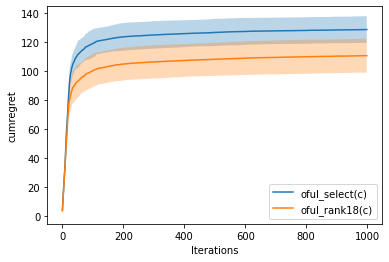

In [25]:
best = ranking[0][0]
nu.compare('../logs', ['oful_select(c)', best], 'cumregret', seeds)

Representations selected by model-selection algorithm

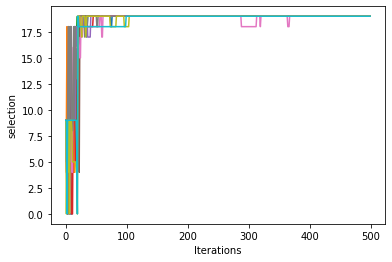

In [26]:
nu.plot_all('../logs', 'oful_select(c)', 'selection', seeds, rows=500)

## Why the difference? (different HLS representations)

Original HLS representation

In [27]:
rA = r0

Constructed HLS representation

In [28]:
rB = make_hls_rank(r0._rewards, dim=dim, rank=dim)

Both are HLS and equivalent

In [29]:
assert rA == rB
assert is_hls(rA)
assert is_hls(rB)

But the performance of OFUL is different

In [30]:
problem = FiniteMultiBandit(nc, na, [rA, rB])

In [31]:
for seed in seeds:
        problem.select_rep(0)
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='ofulA')
        problem.select_rep(1)
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='ofulB')

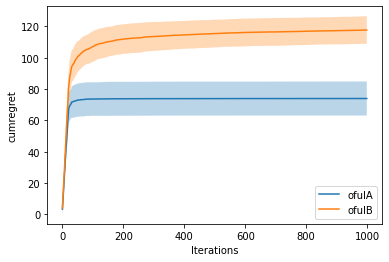

In [32]:
nu.compare('../logs', ['ofulA', 'ofulB'], 'cumregret', seeds)

The reason may be that the minimum eigenvalue of optimal features is different

In [33]:
hls_lambda(rA)

190.90798018287032

In [34]:
hls_lambda(rB)

45.21889497258414

In [35]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_selectAB')

oful_select is able to select the best representation

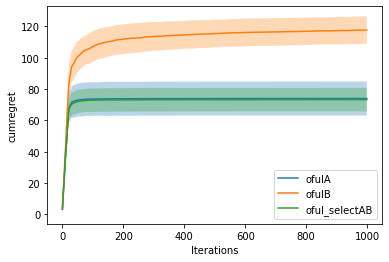

In [36]:
nu.compare('../logs', ['ofulA', 'ofulB', 'oful_selectAB'], 'cumregret', seeds)

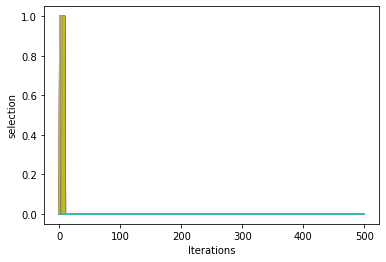

In [37]:
nu.plot_all('../logs', 'oful_selectAB', 'selection', seeds, rows=500)